In [1]:
import pandas as pd
file_path = r"mushroom.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

In [2]:
print(df.head())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [3]:
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [9]:
print(df.describe(include='all'))

         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000   
unique             

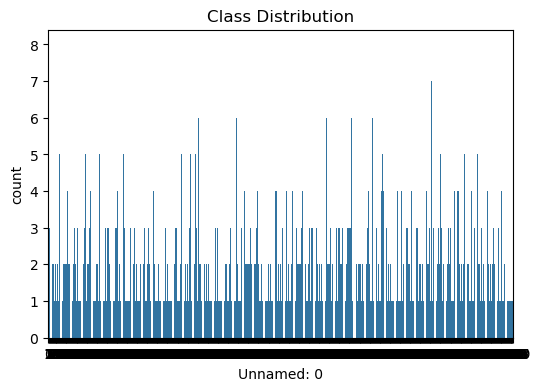

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
target_column = df.columns[0]  
plt.figure(figsize=(6,4))
sns.countplot(x=df[target_column])
plt.title("Class Distribution")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
print(df.head())

   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target_column])  # Use the identified target column name
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_model = SVC(kernel='linear')  # Start with a linear kernel
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.725


In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          28       0.00      0.00      0.00         0
          29       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          48       0.33      1.00      0.50         1
          51       0.00      0.00      0.00         1
          52       1.00      1.00      1.00         1
   

C:\Users\marri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


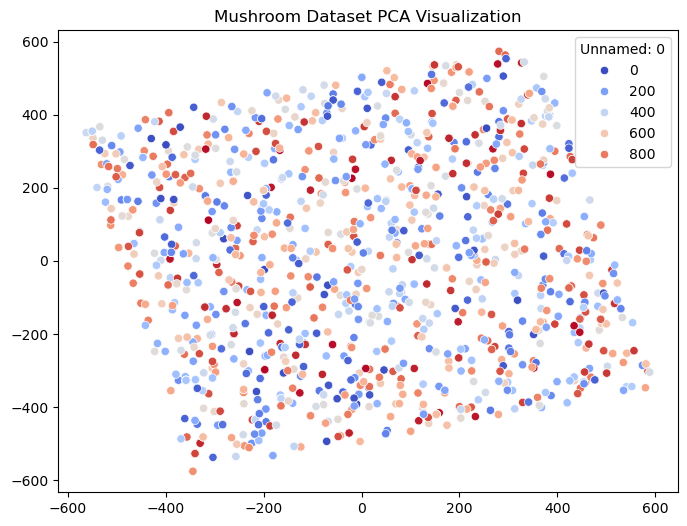

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm")
plt.title("Mushroom Dataset PCA Visualization")
plt.show()


In [19]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))


Kernel: linear
Accuracy: 0.725

Kernel: poly
Accuracy: 0.0225

Kernel: rbf
Accuracy: 0.0075

Kernel: sigmoid
Accuracy: 0.0


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

C:\Users\marri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [21]:
best_svm = SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'])
best_svm.fit(X_train, y_train)
y_pred_best = best_svm.predict(X_test)
from sklearn.metrics import accuracy_score
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))


Optimized Model Accuracy: 0.725
